In [121]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from config import api_key
import matplotlib.patches as mpatches
#Find the best genre for each month out of 2019 - Andrew

In [2]:
base_url = 'https://developers.themoviedb.org/3/discover/movie-discover'

In [3]:

#this one should return a list of movies in 2019 based on an id sorted by popularity
url="https://api.themoviedb.org/3/discover/movie?api_key="+api_key
pop="&primary_release_year=2019&include_adult=False&page="

In [6]:
#this should return the genre id list
GenreID="https://api.themoviedb.org/3/genre/movie/list?api_key="
Gen="&language=en-US"
querys = f"{GenreID}{api_key}{Gen}"
responses = requests.get(querys).json()
genres=[]
genreword=[]
for k in range(0,19,1):
    try:
        genres.append(responses['genres'][k]['id'])
        genreword.append(responses['genres'][k]["name"])
    except:
        genres.append(np.nan)
        genreword.append(np.nan)
        
GenreFrame=pd.DataFrame({"Genres": genres,
                         "Genre Names": genreword
                        })  
GenreFrame.head()

,Genres,Genre Names
0,28,Action
1,12,Adventure
2,16,Animation
3,35,Comedy
4,80,Crime


In [36]:
genre1 = []
Data=[]
MovieTitle=[]
Pop=[]
VoteAvg=[]
#query = f"{url}{pop}

for i in range(1,501,1):
    query = f"{url}{pop}{i}"
    response = requests.get(query).json()
    #print(response)
    
    for j in range(0,20,1):
        try:
            Pop.append(response['results'][j]["popularity"])
            MovieTitle.append(response['results'][j]["original_title"])
            VoteAvg.append(response['results'][j]["vote_average"])
            genre1.append(response['results'][j]["genre_ids"])
            Data.append(response['results'][j]["release_date"])
            
            
        except TypeError:
            Pop.append(np.nan)
            MovieTitle.append(np.nan)
            VoteAvg.append(np.nan)
            genre1.append(np.nan)
            Data.append(np.nan)
            
            
genre1






[[12, 18, 9648, 878, 53],
 [35, 10749],
 [28, 12, 35, 14],
 [18, 10752],
 [12, 16, 10751],
 [28, 12, 878],
 [80, 18, 53],
 [35, 18, 53],
 [28, 18],
 [28, 12, 16, 35],
 [27, 53],
 [35, 9648],
 [28, 878],
 [28, 12, 35],
 [35, 80, 18, 53],
 [28, 16, 35],
 [18, 10749],
 [12, 35, 14, 10749, 10751],
 [28, 18, 36],
 [35, 80, 18, 53],
 [28, 18, 36, 10752],
 [35],
 [12, 10751],
 [28, 35, 27],
 [28, 12, 35],
 [28, 12, 878],
 [12, 14, 10751],
 [35, 18, 53],
 [35, 18, 10752],
 [18],
 [28, 80, 18, 53],
 [28, 12, 878],
 [28, 12, 878],
 [12, 18],
 [35, 10749, 10751],
 [18],
 [16, 10749],
 [28, 80, 53],
 [28, 53],
 [27],
 [12, 16, 35, 14, 10751],
 [28, 18, 53],
 [28, 53],
 [18, 14, 27],
 [28, 12, 878],
 [80, 18, 53],
 [28, 80],
 [18],
 [16],
 [18, 53],
 [28, 80, 18],
 [18, 36],
 [80, 18, 36],
 [18, 35, 36],
 [18, 36, 10749],
 [28, 80, 18, 878, 53],
 [10749, 35],
 [12, 10402, 10751, 10770],
 [12, 16, 35, 10751],
 [16],
 [28, 35, 14],
 [12, 16, 10751],
 [878, 28],
 [28, 12, 878, 53],
 [16, 35, 14, 10751

In [77]:
Movies=pd.DataFrame({'Movie Title':MovieTitle,
                    'Popular Score':Pop,
                    'Vote Average':VoteAvg,
                    'Genres':genre1,
                    'Release Date': Data})
Movies.set_index('Movie Title')

Movies
Parse=Movies["Genres"].apply(pd.Series)
GenreFrame

Movies.head()
Movies["Genres"].value_counts()
Movies['Month']=pd.DatetimeIndex(Movies["Release Date"]).month
#score=Movies.iloc(Movies["Month"])

Janscore = Movies.loc[Movies["Month"] == 1]
Febscore= Movies.loc[Movies["Month"] == 2]
Marscore= Movies.loc[Movies["Month"] == 3]
Aprscore= Movies.loc[Movies["Month"] == 4]
Mayscore= Movies.loc[Movies["Month"] == 5]
Junscore= Movies.loc[Movies["Month"] == 6]
Julscore= Movies.loc[Movies["Month"] == 7]
Augscore= Movies.loc[Movies["Month"] == 8]
Septscore= Movies.loc[Movies["Month"] == 9]
Octscore= Movies.loc[Movies["Month"] == 10]
Novscore= Movies.loc[Movies["Month"] == 11]
Decscore= Movies.loc[Movies["Month"] == 12]

Jan=Janscore.loc[Janscore['Popular Score'].idxmax()]
Ja=Jan['Genres'][0]
Feb=Febscore.loc[Febscore['Popular Score'].idxmax()]
Fe=Feb['Genres'][0]
Mar=Marscore.loc[Marscore['Popular Score'].idxmax()]
Ma=Mar['Genres'][0]
Apr=Aprscore.loc[Aprscore['Popular Score'].idxmax()]
Ap=Apr['Genres'][0]
May=Mayscore.loc[Mayscore['Popular Score'].idxmax()]
Mayo=May['Genres'][0]
June=Junscore.loc[Junscore['Popular Score'].idxmax()]
Junio=June['Genres'][0]
July=Julscore.loc[Julscore['Popular Score'].idxmax()]
Julio=July['Genres'][0]
Aug=Augscore.loc[Augscore['Popular Score'].idxmax()]
Au=Aug['Genres'][0]
Sept=Septscore.loc[Septscore['Popular Score'].idxmax()]
Se=Sept['Genres'][0]
Oct=Octscore.loc[Octscore['Popular Score'].idxmax()]
Oc=Oct['Genres'][0]
Nov=Novscore.loc[Novscore['Popular Score'].idxmax()]
No=Nov['Genres'][0]
Dec=Decscore.loc[Decscore['Popular Score'].idxmax()]
De=Dec['Genres'][0]
De


28

In [104]:
Months=Movies.groupby(Movies["Month"])
MaxMonthScore=Months["Popular Score"].max()
MaxMonthScore
TopGenreframe=pd.DataFrame({"Month":["Jan","Feb","Mar","Apr","May","June","July","Aug","Sep","Oct","Nov","Dec"],
                            "Genres":[Ja,Fe,Ma,Ap,Mayo,Junio,Julio,Au,Se,Oc,No,De],
                            "MonthID":[1,2,3,4,5,6,7,8,9,10,11,12]
                             
                            
    
                            })
MaxM=pd.DataFrame({"Month":["Jan","Feb","Mar","Apr","May","June","July","Aug","Sep","Oct","Nov","Dec"],
                            "Top Score":[MaxMonthScore[1],MaxMonthScore[2],MaxMonthScore[3],MaxMonthScore[4],MaxMonthScore[5]
                                     ,MaxMonthScore[6],MaxMonthScore[7],MaxMonthScore[8],MaxMonthScore[9],MaxMonthScore[10],
                                     MaxMonthScore[11],MaxMonthScore[12]]  
                             
                            
    
                            })
MaxM
Basis=pd.merge(TopGenreframe,MaxM,how="inner",on="Month")
Basis

,Month,Genres,MonthID,Top Score
0,Jan,12,1,31.710
1,Feb,18,2,27.599
2,Mar,28,3,37.173
3,Apr,28,4,42.298
4,May,35,5,114.000
5,June,28,6,58.805
6,July,35,7,328.342
7,Aug,28,8,48.471
8,Sep,12,9,365.750
9,Oct,80,10,136.567


Text(0.5, 1.0, 'Top Popularity Score per Month')

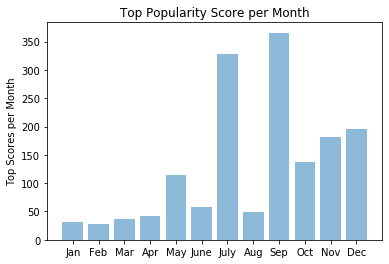

In [123]:
New=pd.merge(GenreFrame,Basis,how="inner",on="Genres")

New.sort_values(by='MonthID', inplace=True)
New

plt.bar(New["Month"],New["Top Score"], align='center', alpha=0.5)
plt.legend
plt.ylabel('Top Scores per Month')
plt.title('Top Popularity Score per Month')


GenandMon=



Text(0.5, 1.0, 'Top Popularity Genre per Month')

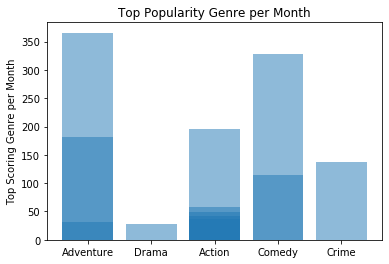

In [120]:
plt.bar(New["Genre Names"],New["Top Score"], align='center', alpha=0.5)

plt.ylabel('Top Scoring Genre per Month')
plt.title('Top Popularity Genre per Month')

In [124]:
New

,Genres,Genre Names,Month,MonthID,Top Score
5,12,Adventure,Jan,1,31.710
11,18,Drama,Feb,2,27.599
0,28,Action,Mar,3,37.173
1,28,Action,Apr,4,42.298
8,35,Comedy,May,5,114.000
2,28,Action,June,6,58.805
9,35,Comedy,July,7,328.342
3,28,Action,Aug,8,48.471
6,12,Adventure,Sep,9,365.750
10,80,Crime,Oct,10,136.567


In [40]:
Movies["Genres"].value_counts()

[]                         1721
[99]                       1669
[18]                       1265
[35]                        623
[27]                        336
                           ... 
[80, 53, 28]                  1
[18, 53, 10752]               1
[28, 16, 35, 80]              1
[18, 14, 36, 10752]           1
[12, 18, 9648, 878, 53]       1
Name: Genres, Length: 755, dtype: int64

In [42]:
Movies["Genres"].unique
GenreFrame
Parse
type(Parse)
Parse.columns=["Genre1","Genre2","Genre3","Genre4","Genre5","Genre6","Genre7"]
names=GenreFrame["Genre Names"]
idsnum=GenreFrame["Genres"]
Parse
print(GenreFrame)
Parse["Genre1"].value_counts()
Parse["Genre2"].value_counts()
Parse

    Genres      Genre Names
0       28           Action
1       12        Adventure
2       16        Animation
3       35           Comedy
4       80            Crime
5       99      Documentary
6       18            Drama
7    10751           Family
8       14          Fantasy
9       36          History
10      27           Horror
11   10402            Music
12    9648          Mystery
13   10749          Romance
14     878  Science Fiction
15   10770         TV Movie
16      53         Thriller
17   10752              War
18      37          Western


,Genre1,Genre2,Genre3,Genre4,Genre5,Genre6,Genre7
0,12.0,18.0,9648.0,878.0,53.0,NaN,NaN
1,35.0,10749.0,NaN,NaN,NaN,NaN,NaN
2,28.0,12.0,35.0,14.0,NaN,NaN,NaN
3,18.0,10752.0,NaN,NaN,NaN,NaN,NaN
4,12.0,16.0,10751.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
9995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,16.0,10751.0,NaN,NaN,NaN,NaN,NaN
9998,16.0,10751.0,NaN,NaN,NaN,NaN,NaN
